# WindSE Grid Convergence Example
**Jordan Perr-Sauer, CSCI5636, Fall 2021**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

## WindSE Background

WindSE is a tool developed by NREL based on Fenics. It solves the Navier-Stokes equations to estimate the power output of a wind farm, given inflow conditions, topology of the terrain, and the location and characteristics of the wind turbines. The tool was developed to aid in the optimization of wind farm layouts.

WindSE supports two types of finite elements, `taylor_hood` and `linear`. The `taylor_hood` element uses quadratic elements the velocity field and linear elements for the pressure field. This type of element is used here.

WindSE supports both 2d and 3d models.

## WindSE API

There are two ways to use WindSE. The first is through the command line. Provided an input parameters file (in YAML format), you can run that file and also override certain parameters in the file with the `windse run` command:

```
!windse run -p domain:nx:50 -p domain:ny:50 convergence-2D-3-Turbine-0x.yaml
```

A second way to interface with WindSE is to use the windse_driver python module. This provides a high level interface to setting up and solving a WindSE problem using the parameters file.

```
params = df.Initialize("convergence-2D-3-Turbine-0x.yaml")
dom, farm = df.BuildDomain(params)
problem = df.BuildProblem(params,dom,farm)
solver = df.BuildSolver(params,problem)
```

Of course, it is also possible to set up and solve custom problems by interfacing with the windse internal classes directly (that is, not using the driver).

# 2D Wind Farm with 3 Turbines

## Run Experiments

First, make sure the output directory is empty. Then, you can run the experiments from the command line:

```python experiment_2d.py```

- Base File: convergence-2D-3-Turbine.yaml
- nx-ny in 10...200 (by 10)


```python experiment_2d_options.py```
Parameters:
- Base File: convergence-2D-3-Turbine.yaml
- nx-ny in {60, 80, ... 200}
- inflow angle in {0.0, $\pi$/16}

## Examine Experiment Output

### Meshes

The meshes are displayed through ParaView. We can observe the automatic cylindrical refinement around the turbine locations.

<img src="static/exp1-mesh-n10.png" width=200 height=200 />
<img src="static/exp1-mesh-n50.png" width=200 height=200 />
<img src="static/exp1-mesh-n100.png" width=200 height=200 />

### Steady State Solution

<img src="static/exp1-velocity-n100.png" width=600 height=400 />

## Convergence of Power Output

Here, the power output is computed for each of the three turbines.

In [83]:
import experiment_2d

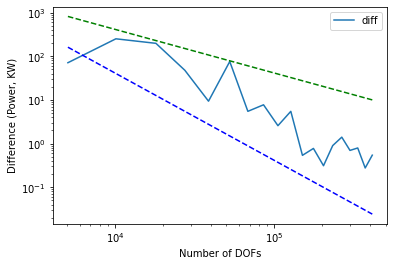

In [87]:
df = experiment_2d.get_results()

df["sum"] = df["sum"] / 10**3
df["diff"] = df["sum"].diff().abs()

df.plot(x="dofs", y="diff", logx=True, logy=True)
plt.xlabel("Number of DOFs")
plt.ylabel("Difference (Power, KW)")
x = df["dofs"][1:]
plt.plot(x, (x.max()*10**4)/x**2, "b--", label="1/x^2")
plt.plot(x, (x.max()*10**1)/x, "g--", label="1/x")
plt.show()

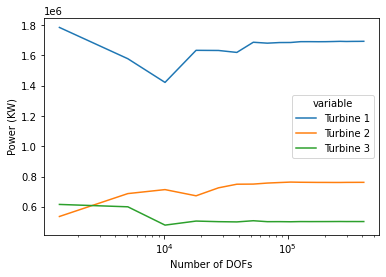

In [103]:
df = experiment_2d.get_results()
df = df.melt(id_vars=["dofs"], value_vars=["Turbine 1", "Turbine 2", "Turbine 3"])

sns.lineplot(data=df, x="dofs", y="value", hue="variable")
plt.xlabel("Number of DOFs")
plt.ylabel("Power (KW)")
plt.xscale("log")
plt.show()

### Two Inflow Angles

Here, we run the same experimental setup between nx=[60,200] and for two different inflow conditions.

<img src="static/exp2-velocity.png" width=300 height=300 />
<img src="static/exp1-velocity-n100.png" width=300 height=300 />

Left: Inflow = $\pi$/16, Right: Inflow = 0.0

In [88]:
import experiment_2d_options

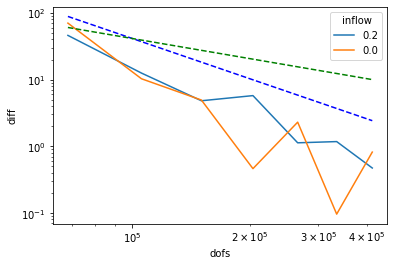

In [95]:
df = experiment_2d_options.get_results()
df["sum"] = df["sum"] / 10**3
df["diff"] = df.sort_values("dofs").groupby("inflow")["sum"].diff().abs()
df["inflow"] = df["inflow"].astype("str")

sns.lineplot(data=df, x="dofs", y="diff", hue="inflow")
plt.xscale("log")
plt.yscale("log")
x = df["dofs"][2:]
plt.plot(x, (x.max()*10**6)/x**2, "b--", label="1/x^2")
plt.plot(x, (x.max()*10**1)/x, "g--", label="1/x")


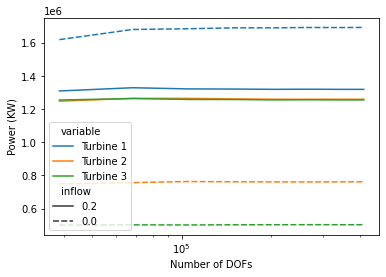

In [111]:
df = experiment_2d_options.get_results()
df["sum"] = df["sum"] / 10**3
df["inflow"] = df["inflow"].astype("str")

df = df.melt(id_vars=["dofs", "inflow"], value_vars=["Turbine 1", "Turbine 2", "Turbine 3"])
sns.lineplot(data=df, x="dofs", y="value", hue="variable", style="inflow")
plt.xlabel("Number of DOFs")
plt.ylabel("Power (KW)")
plt.xscale("log")
plt.show()